#Importing required library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
#uploading the dataset
titan = pd.read_csv('/content/tested.csv')

In [40]:
#checking the numbers of rows and columns of the dataset
titan.shape

(418, 12)

In [41]:
#checking the first 5 rows of the dataset
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
#checking the last 5 rows of the dataset
titan.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [43]:
##checking the statistical distributions of the dataset
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
#checking the data types in  the dataset
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [45]:
#checking for missing values in the dataset
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


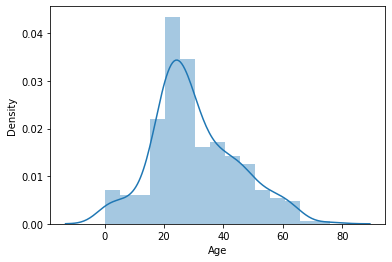

In [46]:
##checking the distributions of age in  the dataset
sns.distplot(titan.Age)

In [47]:
#replacing the missing values with the median of the columns dataset
titan['Age'].fillna(titan['Age'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


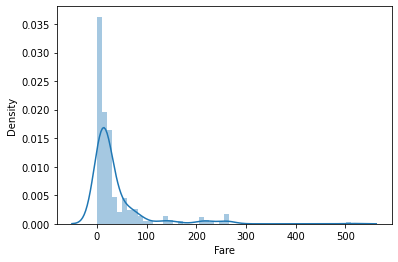

In [48]:
#replacing the distributions of Fare in the dataset
sns.distplot(titan.Fare)

In [49]:
#replacing the missing values with the mode of the columns dataset
titan['Fare'].fillna(titan['Fare'].mode(),inplace=True)

In [50]:
# dropping the missing categorical datapoints
titan = titan.dropna(subset=['Cabin'])

In [51]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [52]:
titan.shape

(91, 12)

#0....Means didnt survived


#1....Means survived

In [53]:
#checking the class distributions of the target datapoints
titan['Survived'].value_counts()

0    47
1    44
Name: Survived, dtype: int64

In [54]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


#Enoding the categorical columns

In [55]:
le = LabelEncoder()

In [56]:
titan['Sex'] = le.fit_transform(titan['Sex'])
titan['Ticket'] = le.fit_transform(titan['Ticket'])
titan['Cabin'] = le.fit_transform(titan['Cabin'])
titan['Embarked'] = le.fit_transform(titan['Embarked'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [57]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,34,82.2667,12,2
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,69,61.1750,60,2
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,57,262.3750,15,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,9,61.9792,10,0
28,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,7,30.5000,2,2


In [58]:
# separating the datapoints into features and target
X = titan.drop(['Name','Survived'],axis=1)
Y= titan['Survived']

#Splitting the dataset into training and testing data

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)

In [60]:
classifier = LinearRegression()

In [61]:
classifier.fit(X_train,Y_train)

LinearRegression()

In [62]:
X_train_pred = classifier.predict(X_train)
prediction = metrics.r2_score(Y_train, X_train_pred)


In [63]:
print(prediction)

1.0


In [64]:
X_test_pred = classifier.predict(X_test)
prediction = metrics.r2_score(Y_test, X_test_pred)


In [65]:
print(prediction)

1.0


In [66]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,34,82.2667,12,2
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,69,61.1750,60,2
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,57,262.3750,15,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,9,61.9792,10,0
28,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,7,30.5000,2,2


In [67]:
titan.to_csv('X.csv',index=False)

In [68]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,0,23.0,1,0,34,82.2667,12,2
14,906,1,0,47.0,1,0,69,61.1750,60,2
24,916,1,0,48.0,1,3,57,262.3750,15,0
26,918,1,0,22.0,0,1,9,61.9792,10,0
28,920,1,1,41.0,0,0,7,30.5000,2,2


#Building a prediction system

In [69]:
input_data = (966,1,0,35.0,0,0,8,211.5,25,0)

In [70]:
input_data_np  = np.asarray(input_data)

In [71]:
input_resh = input_data_np.reshape(1, -1)

In [72]:
prediction = classifier.predict(input_resh)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [73]:
print(prediction)

[1.]


In [74]:
if (prediction[0] ==1):
  print('Did not survived')
else:
  print('Survived')

Survived
